In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Aldona\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

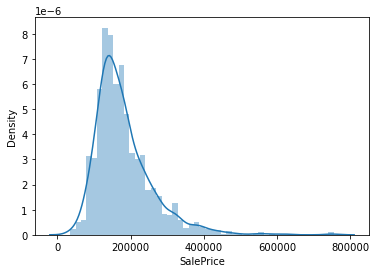

In [5]:
sns.distplot(df['SalePrice'])

In [6]:
brakujace_dane = df.isnull().sum().sort_values(ascending=True)
brakujace_dane.tail(50)

Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
LotConfig           0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
MSSubClass          0
YearRemodAdd        0
Utilities           0
Electrical          1
MasVnrType          8
MasVnrArea          8
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
BsmtFinType2       38
BsmtExposure       38
GarageQual         81
GarageFinish       81
GarageYrBlt        81
GarageType         81
GarageCond         81
LotFrontage       259
FireplaceQ

In [7]:
# profile = ProfileReport(df, title='Pandas Profiling Report_2', explorative=True)
# profile.to_file("your_report.html")

<AxesSubplot:>

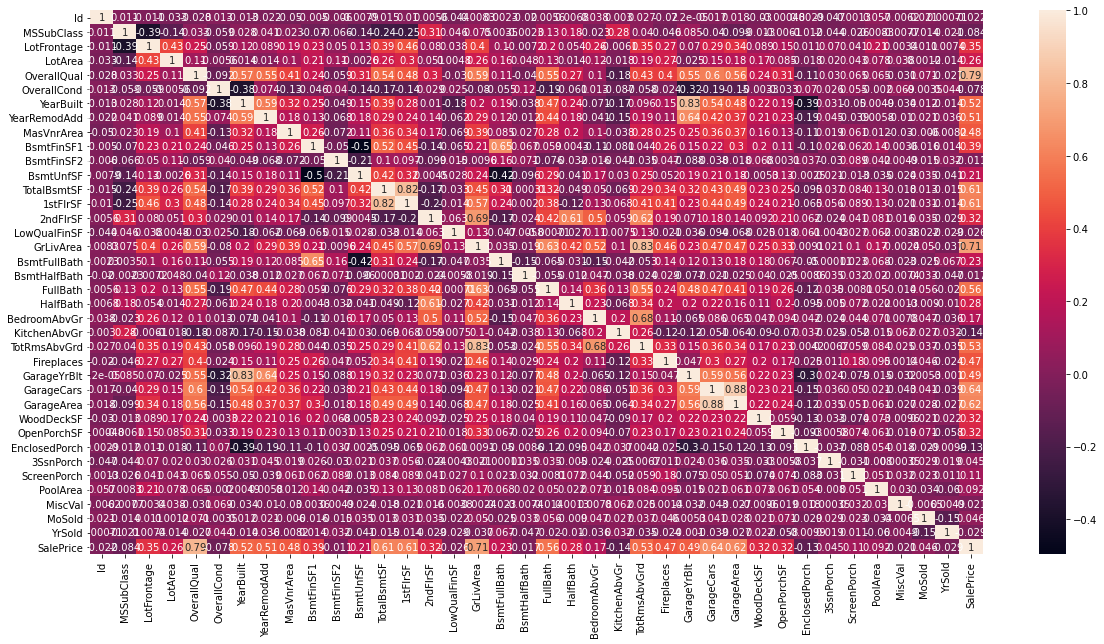

In [8]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)

In [9]:
df_corr=df[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]

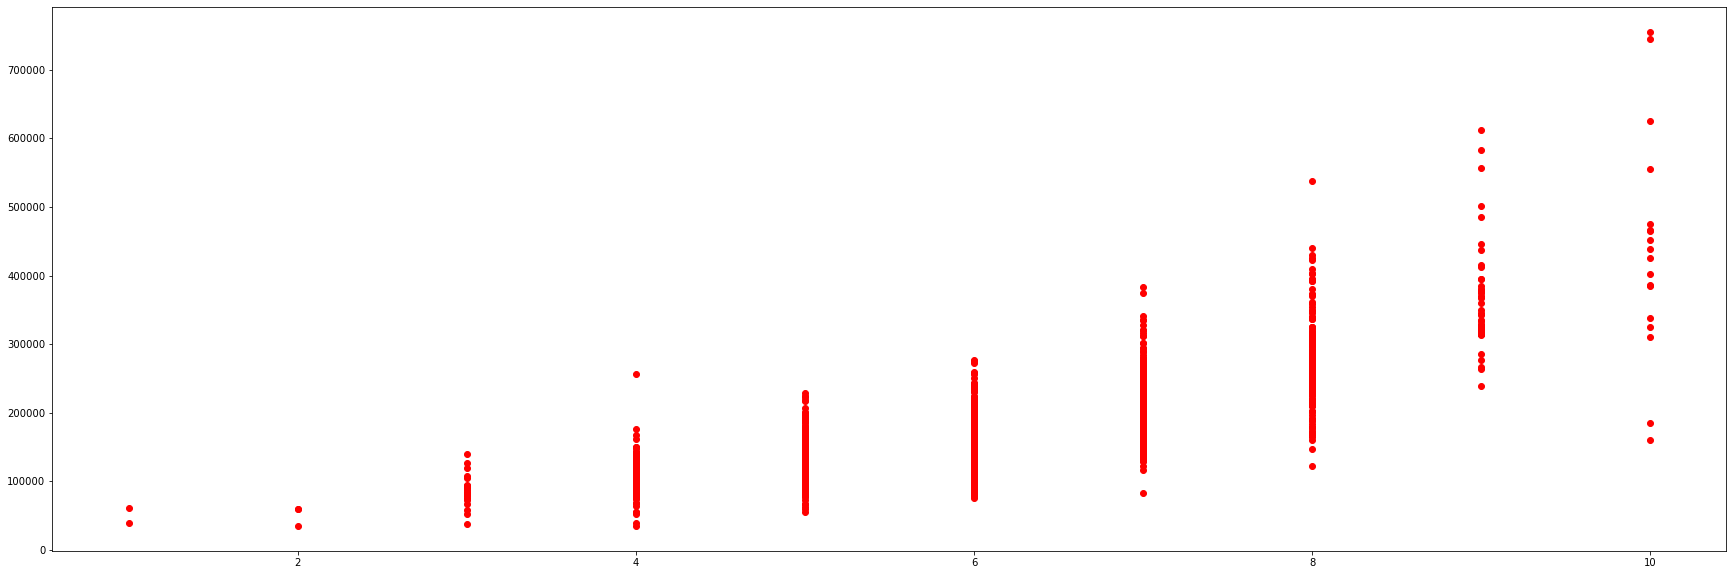

In [10]:
plt.figure(figsize=(30,10))
plt.scatter(df_corr['OverallQual'], df_corr['SalePrice'],  color='red')

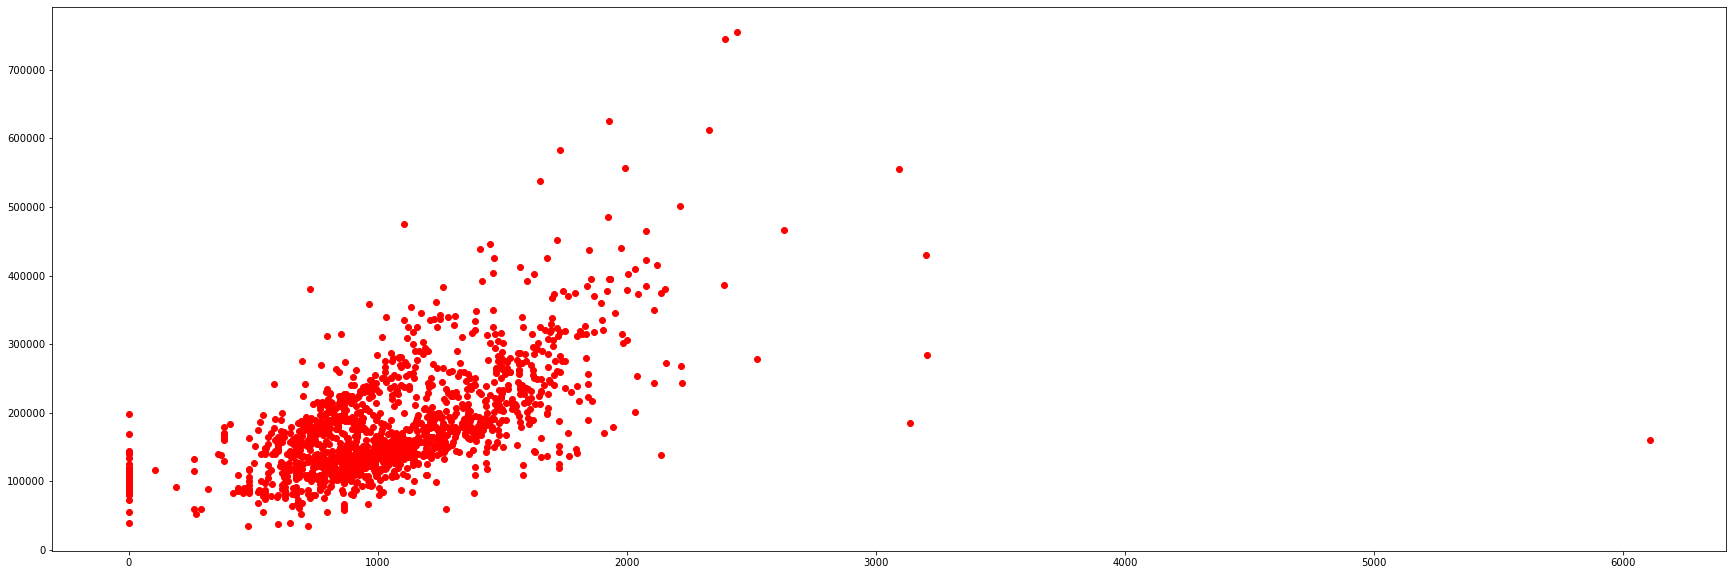

In [11]:
plt.figure(figsize=(30,10))
plt.scatter(df_corr['TotalBsmtSF'], df_corr['SalePrice'],  color='red')


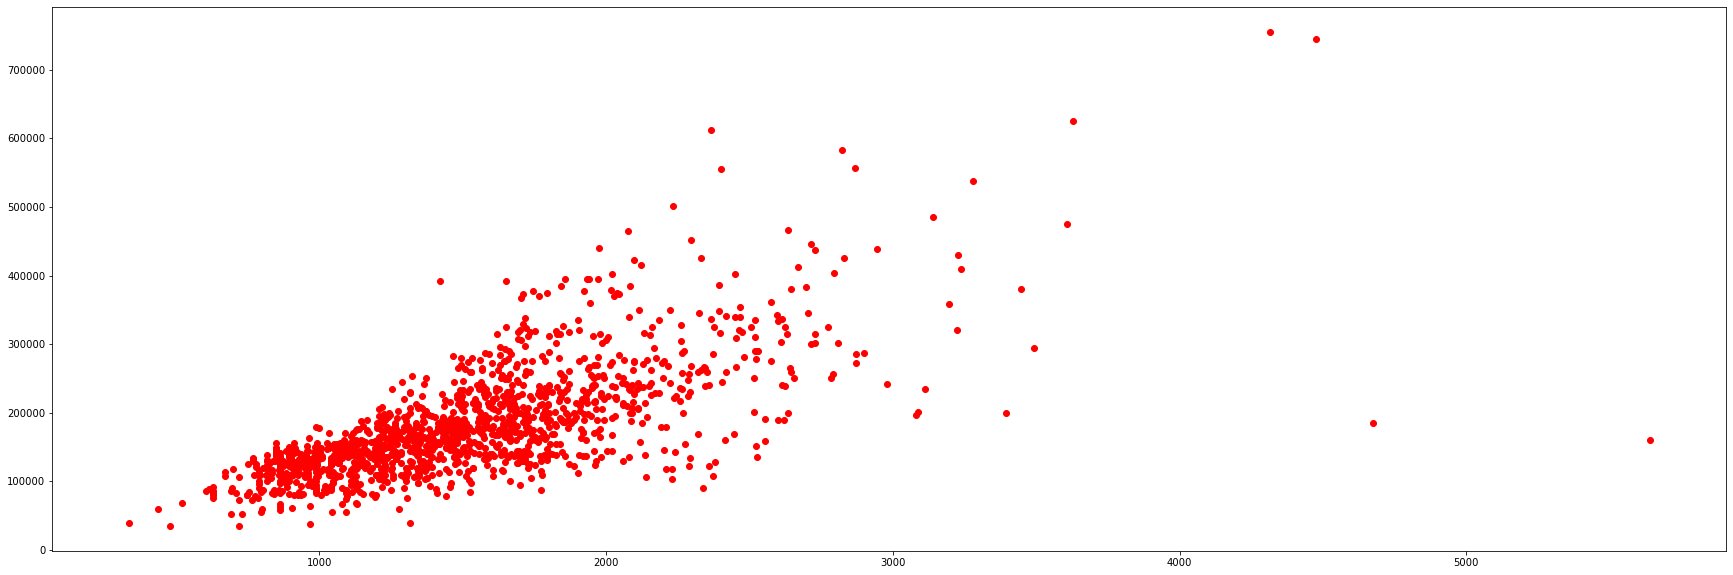

In [12]:
plt.figure(figsize=(30,10))
plt.scatter(df_corr['GrLivArea'], df_corr['SalePrice'],  color='red')


<AxesSubplot:xlabel='GrLivArea'>

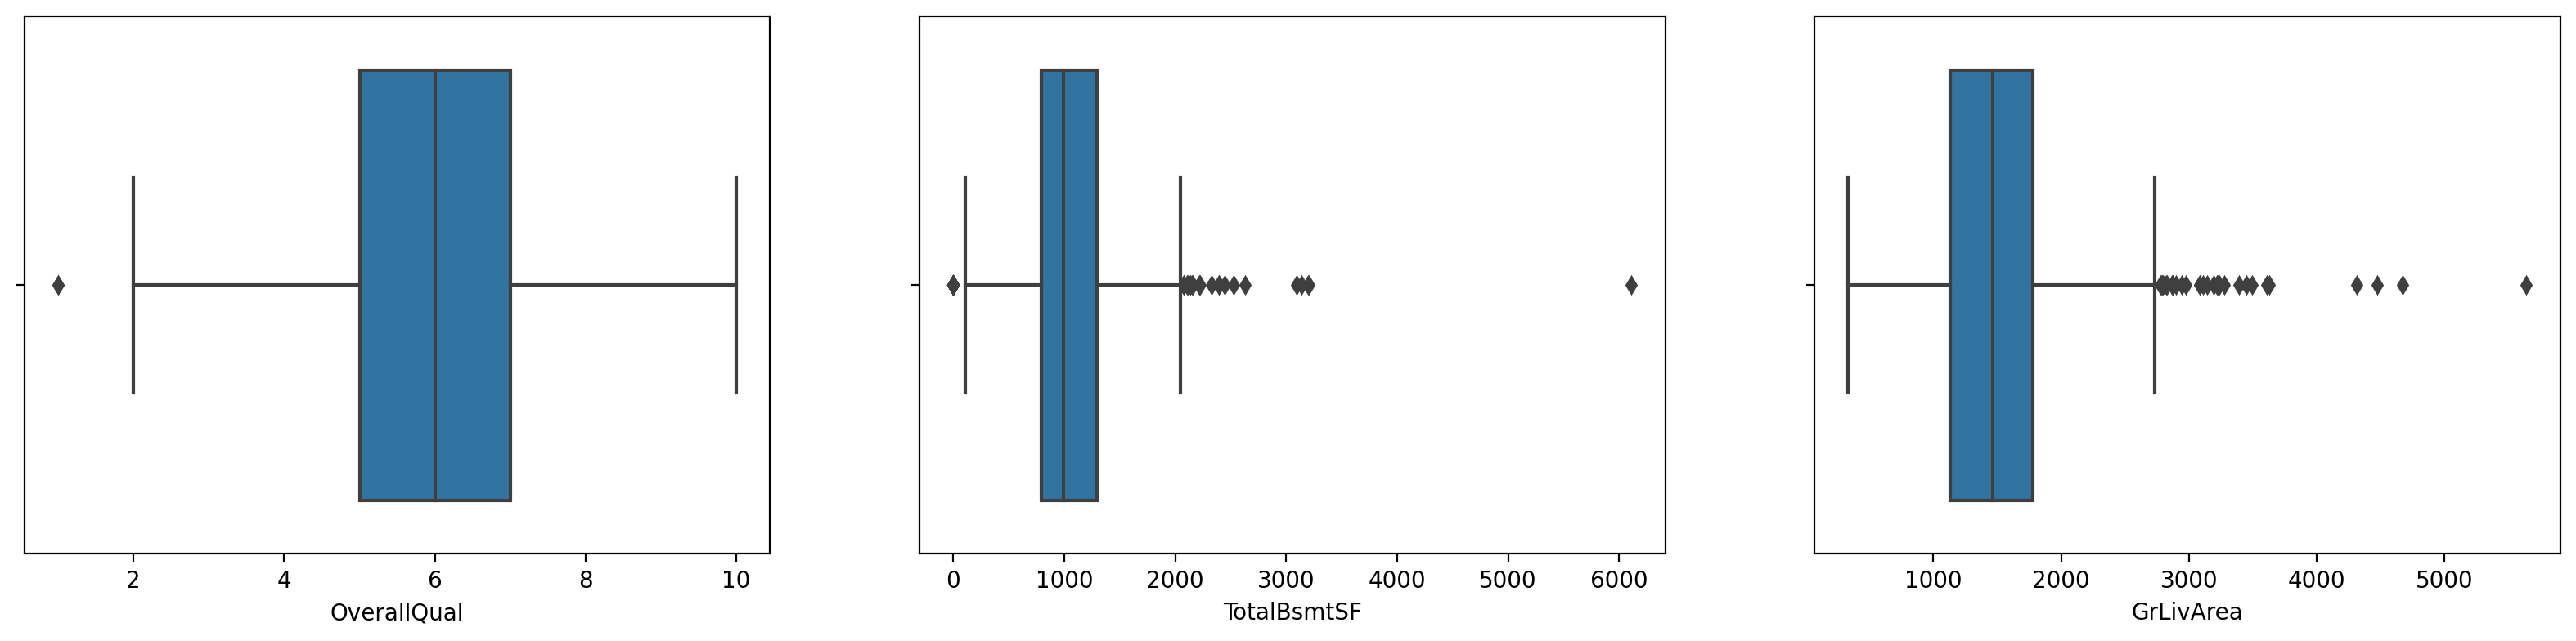

In [13]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'OverallQual', data = df_corr)

plt.subplot(4,3,2)
sns.boxplot(x = 'TotalBsmtSF', data = df_corr)

plt.subplot(4,3,3)
sns.boxplot(x = 'GrLivArea', data = df_corr)

In [14]:
from scipy import stats

z = np.abs(stats.zscore(df_corr[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

[[0.65147924 0.45930254 0.37033344 0.34727322]
 [0.07183611 0.46646492 0.48251191 0.00728832]
 [0.65147924 0.31336875 0.51501256 0.53615372]
 ...
 [0.65147924 0.21564122 1.56964722 1.07761115]
 [0.79515147 0.04690528 0.83278768 0.48852299]
 [0.79515147 0.45278362 0.49393395 0.42084081]]


*******************************************************************************


Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze


(array([  58,  118,  178,  185,  185,  197,  224,  304,  332,  349,  375,
        389,  440,  440,  473,  496,  496,  496,  523,  523,  527,  533,
        591,  608,  635,  664,  691,  691,  691,  769,  769,  798,  798,
        803,  898, 1044, 1046, 1142, 1169, 1169, 1182, 1182, 1182, 1243,
       1268, 1298, 1298, 1353, 1373, 1373], dtype=int64), array([3, 2, 3, 2, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 0,
       3, 2, 2, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 3, 3,
       2, 1, 2, 2, 1, 3], dtype=int

In [15]:
df_outliers_removed = df_corr[(z<3).all(axis=1)]

In [16]:
df_outliers_removed.shape

(1424, 4)

In [17]:
df_corr.shape

(1460, 4)

C:\Users\Aldona\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


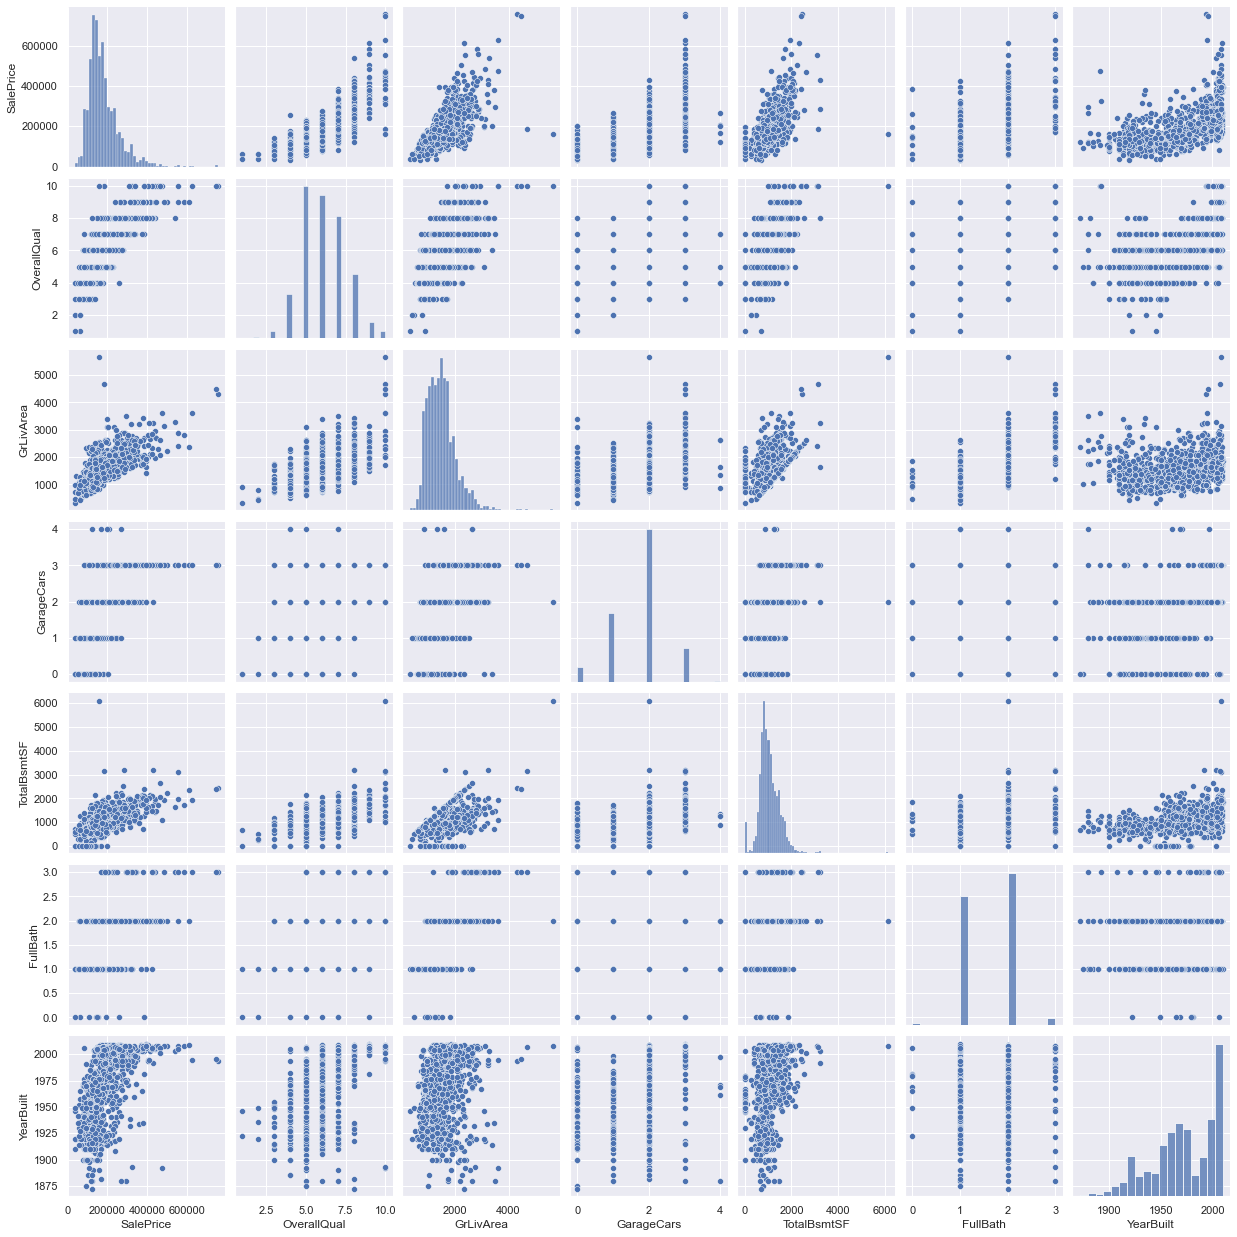

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

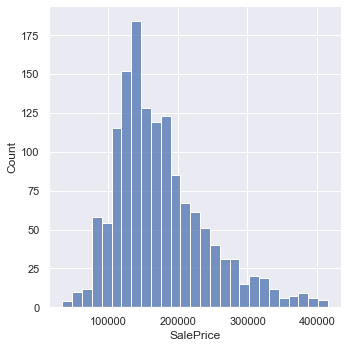

In [24]:
sns.displot(df_outliers_removed['SalePrice'],hue_norm=True)
